In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import tif
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
from pathlib import Path

# Use forward slashes
data_dir = Path('D:/Data science/Deep learning/datasets/flower_photos/flower_photos')

print("Path exists:", data_dir.exists())  # Should be True

image_count = len(list(data_dir.glob('*/*.jpg')))
print("Total images found:", image_count)


Path exists: True
Total images found: 3670


In [7]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [8]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [9]:
X=np.array(X)
y=np.array(y)


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
x_train_scaled=x_train/255
x_test_scaled=x_test/255
num_classes = 5

model = keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scaled, y_train, epochs=20)    

Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.3639 - loss: 1.4582
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.5869 - loss: 1.0539
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.6696 - loss: 0.8849
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - accuracy: 0.7599 - loss: 0.6583
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.8412 - loss: 0.4573
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.9082 - loss: 0.2954
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9524 - loss: 0.1522
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 43s 540ms/step - accuracy: 0.9872 - loss: 0.0650
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 24s 287ms/step - accuracy: 0.9885 - loss: 0.0486
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - accuracy: 0.9964 - loss: 0.0205
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 150ms/step - accuracy: 0.9850 - loss: 0.0444
Epoch 12/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 22s

In [13]:
pridict= model.predict(x_test)
pridict

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


array([[  739.0622  , -1418.5669  , -1941.1154  ,  1252.1023  ,
           59.195274],
       [-2252.7239  , -5175.31    ,  1997.3452  ,  3861.885   ,
         -417.04208 ],
       [ -391.56747 ,   320.99823 , -1301.3146  ,   654.01373 ,
          429.94476 ],
       ...,
       [  979.84247 ,  -595.925   , -2756.5166  ,  -140.47415 ,
         4373.4526  ],
       [-1087.3055  , -1170.4335  ,  1201.6887  ,  -657.2679  ,
         -384.13754 ],
       [ -328.83264 ,  -247.94792 ,    42.34937 ,  -168.48001 ,
         -498.84787 ]], dtype=float32)

In [17]:
soft_max_predict= tf.nn.softmax(pridict)
soft_max_predict
model.evaluate(x_test_scaled,y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6078 - loss: 2.7714


[2.6541848182678223, 0.6112625002861023]

## increase accuracy using data_Augmentation function

In [22]:
from tensorflow import keras
from tensorflow.keras import layers
img_height = 180
img_width = 180

data_aug = keras.Sequential([
    layers.RandomZoom(0.1),
    layers.RandomRotation(0.1),
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
])



d:\Data science\venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


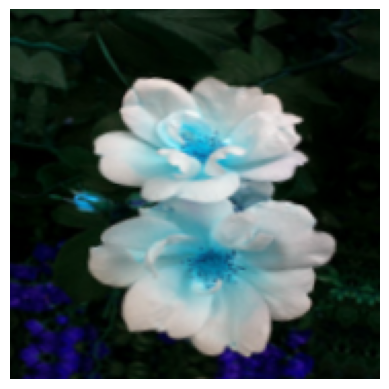

In [24]:
plt.axis('off')
plt.imshow(data_aug(X)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)  